# Import Packages and Reading of Data

In [1]:
import time
import warnings
import pickle
import shap

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb # recommended version: 1.5.0

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedKFold
from xgboost import plot_importance

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [2]:
# Reading of Excel
train_metadata = pd.read_csv('train_dataset.csv')
test_metadata = pd.read_csv('test_dataset.csv')

In [3]:
train_metadata

,protected,verified,location,followers_count,following_count,tweet_count,listed_count,has_profile_image,un_no_of_char,un_special_char,name_no_of_char,name_special_char,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,has_url,isBot
0,0,0,0,-0.058996,-0.101765,-0.375390,-0.064435,1,-0.277500,0,-0.270732,0,-0.264936,-0.226362,0,1,1,1
1,0,0,0,-0.058509,-0.061982,-0.024002,-0.064274,1,-0.277500,0,-1.193893,0,-0.264936,-0.226362,0,1,0,0
2,0,0,1,-0.058917,-0.092427,-0.206857,-0.062335,1,0.094003,0,0.467797,0,-0.264936,-0.226362,0,1,1,0
3,0,0,1,-0.057353,0.078232,-0.321707,-0.059427,1,1.580014,0,0.098533,0,6.295222,-0.226362,1,1,1,0
4,0,0,1,-0.058873,-0.094191,-0.207697,-0.064112,1,-0.277500,0,-0.270732,0,-0.264936,-0.226362,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16226,0,1,1,0.183041,2.307269,0.000665,-0.002560,1,1.580014,1,0.652429,0,-0.264936,-0.226362,1,1,1,1
16227,0,0,1,-0.058544,-0.093461,-0.219648,-0.057004,1,-0.277500,0,1.390958,0,-0.264936,-0.226362,0,1,0,0
16228,0,0,1,-0.058863,-0.095256,-0.194927,-0.062820,1,1.208511,0,0.652429,0,-0.264936,-0.226362,0,1,1,0
16229,0,0,0,-0.058952,-0.071228,-0.375411,-0.064274,1,-0.277500,0,-0.270732,0,-0.264936,-0.226362,0,1,1,1


In [4]:
test_metadata

,protected,verified,location,followers_count,following_count,tweet_count,listed_count,has_profile_image,un_no_of_char,un_special_char,name_no_of_char,name_special_char,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,has_url,isBot
0,0,0,1,-0.058983,-0.100670,-0.376092,-0.063789,1,0.094003,1,-0.086100,0,-0.264936,-0.226362,0,1,0,0
1,0,0,1,-0.058989,-0.103012,-0.357559,-0.063466,1,-0.277500,1,1.206326,0,-0.264936,-0.226362,0,1,1,0
2,0,0,1,-0.058999,-0.105992,-0.292224,-0.064435,1,1.208511,1,1.206326,0,-0.264936,-0.226362,0,1,1,0
3,0,0,1,-0.058434,-0.075790,-0.296583,-0.059750,1,-0.649002,0,1.390958,1,1.375103,-0.226362,0,1,1,0
4,0,0,0,-0.046815,-0.021621,2.165586,-0.013061,1,1.580014,1,-1.563157,0,1.375103,-0.226362,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053,0,0,0,-0.058997,-0.100578,-0.375454,-0.064435,1,-0.649002,0,-0.455364,0,-0.264936,-0.226362,0,1,1,1
4054,0,0,1,-0.058892,-0.086253,-0.217617,-0.063789,1,-0.277500,0,-1.193893,0,-0.264936,-0.226362,0,1,0,0
4055,0,0,1,-0.058947,-0.084458,-0.365236,-0.062335,1,0.465506,0,0.098533,0,3.015143,-0.226362,0,1,0,0
4056,0,0,1,-0.058681,-0.097932,-0.282102,-0.020977,1,-1.020505,0,0.098533,0,-0.264936,-0.226362,0,1,1,1


In [5]:
x_train = train_metadata.drop(columns = "isBot")
x_test = test_metadata.drop(columns = "isBot")
y_train = train_metadata["isBot"]
y_test = test_metadata["isBot"]

# Models
1. Logistic Regression
2. Support Vector Classifier
3. Random Forest Classifier
4. Adaboost Classifer
5. Gradient Boosting Classifier

## 01 Logistic Regression
* Model 
* Error Metrics
* Plot for Feature Importance

In [6]:
# Model
log_regression = LogisticRegression()

In [7]:
%%time

# Fit Model
log_model = log_regression.fit(x_train, y_train)

Wall time: 40.3 ms


In [8]:
%%time

# y_prediction
y_pred = log_model.predict(x_test)

Wall time: 2.62 ms


In [9]:
# Error Metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
lg_loss = metrics.log_loss(y_test, y_pred)
print(f'Log Loss: {lg_loss}')
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')
f1_score = metrics.f1_score(y_test, y_pred)
print(f'F1-score: {f1_score}')
precision = metrics.precision_score(y_test, y_pred)
print(f'Precision: {precision}')
recall = metrics.recall_score(y_test, y_pred)
print(f'Recall: {recall}')
report = metrics.classification_report(y_test, y_pred)
print(f'Classification Report: \n {report}')

Accuracy: 0.8144406111384919
Log Loss: 6.409033451270664
ROC AUC: 0.7141082681041697
F1-score: 0.5909831613253667
Precision: 0.7321668909825033
Recall: 0.49544626593806923
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      2960
           1       0.73      0.50      0.59      1098

    accuracy                           0.81      4058
   macro avg       0.78      0.71      0.74      4058
weighted avg       0.81      0.81      0.80      4058



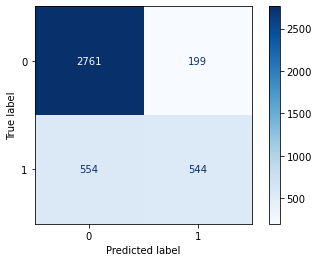

In [10]:
# Confusion Matrix Plot
metrics.plot_confusion_matrix(log_model, x_test, y_test, cmap = "Blues")
plt.show()

## Feature Importance

In [11]:
# Feature importance
feature = pd.DataFrame(log_model.coef_.T, x_train.columns.T, columns = ['Feature Importance']).sort_values(by = 'Feature Importance', ascending=False)
feature

,Feature Importance
has_url,1.053348
has_description,0.661153
un_no_of_char,0.565974
following_count,0.541676
listed_count,0.151430
name_no_of_char,0.147758
tweet_count,0.072129
des_no_of_hashtags,0.044424
has_profile_image,-0.074285
verified,-0.092740


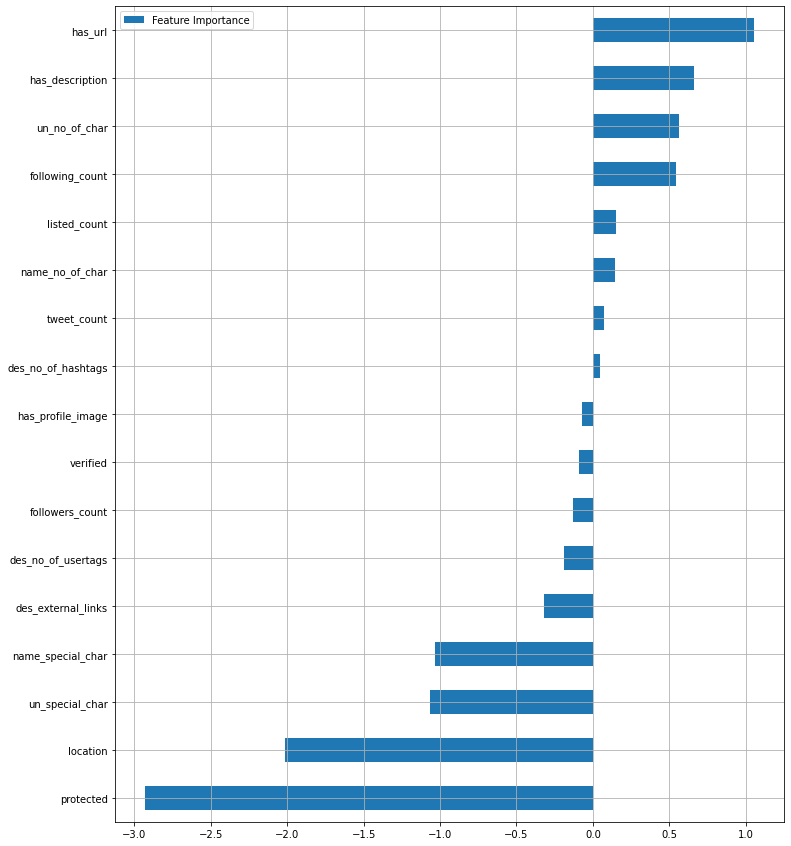

In [12]:
# Feature importance
fig = feature.plot(kind="barh", figsize=(12, 15))
bg = fig.patch
bg.set_facecolor("white")
plt.gca().invert_yaxis()
plt.grid()
plt.show()